In [1]:

# ! pip install numpy
# ! pip install pandas
# ! pip install tqdm


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from scipy import stats
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('BlueBikeDay.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data Card

| Feature | Description |
| ------ | ------ |
| instant | Primary Key |
| dteday | Date in mm/dd/yy |
| season | seasons [1:spring, 2:summer, 3:fall, 4:winter] |
| yr | year [0: 2011, 1:2012] |
| mnth | [calendar months 1 to 12] |
| holiday | is Holiday? |
| weekday | yday of the week |
| workingday | 0: weekday, 1: weekend/holiday |
| weathersit | weather [1: clear, 2: Cloudy, 3: Snowy, 4: Thunderstorm] |
| temp |  temperature in Celsius. |
| atemp | Feels like temperature in Celsius. |
| hum | Humidity |
| windspeed | windspeed |
| casual | count of casual users |
| registered | count of registered users |
| cnt | Total registered |

In [4]:
df.info()
# since dteday is a string, we need to convert it to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df['dteday'] = pd.to_datetime(df['dteday'])

why convert obj to Datetime: for better timeseries analysis like ARIMA

In [6]:
df_with_climate = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

explain KDE curve

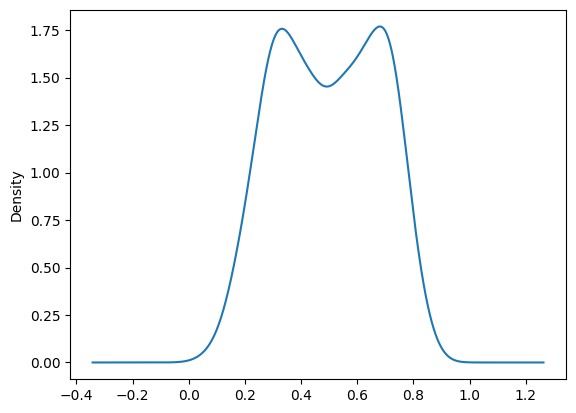

In [7]:
temp_curve = df_with_climate['temp'].plot.kde()

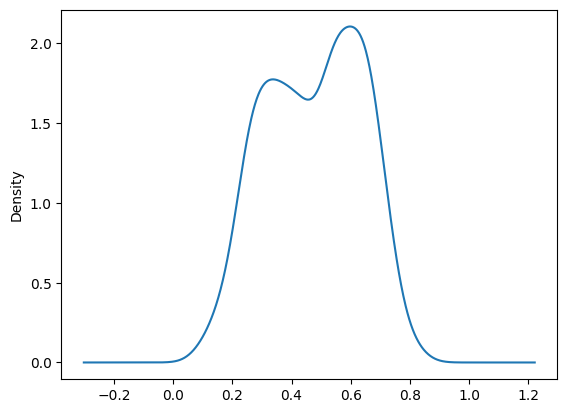

In [8]:
atemp_curve = df_with_climate['atemp'].plot.kde()

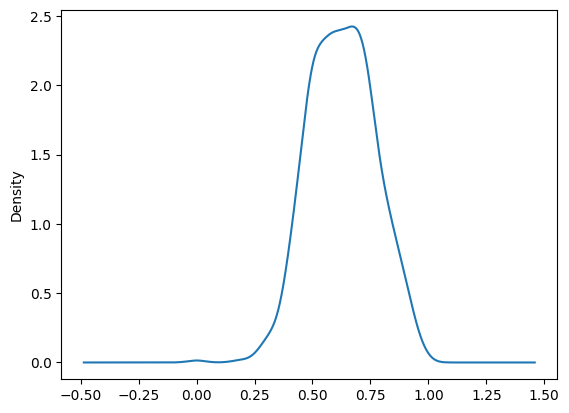

In [9]:
humidity_curve = df_with_climate['hum'].plot.kde()

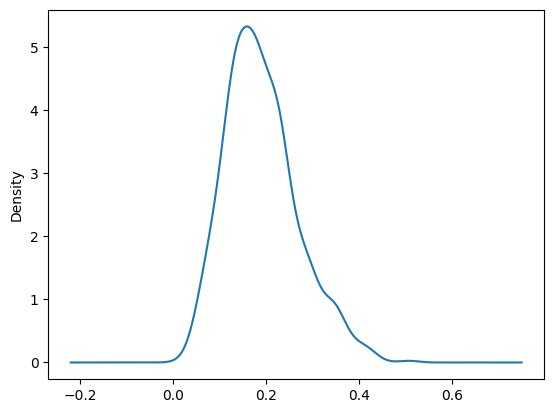

In [10]:
windspeed_curve = df_with_climate['windspeed'].plot.kde()

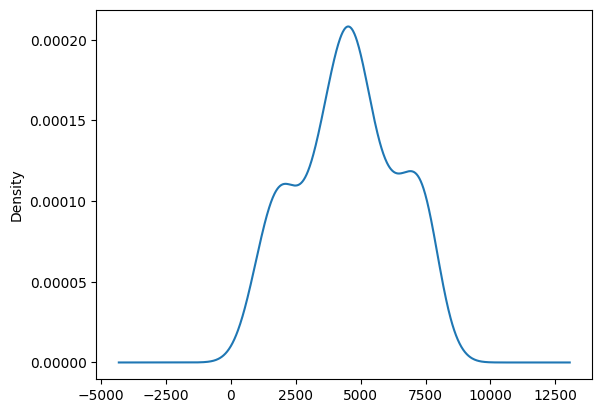

In [11]:
cnt_curve = df_with_climate['cnt'].plot.kde()

We can see that that temp, atemp, hum and windspeed all have a bell curve.
what is gaussia curve

outliers and what they are, why do we want to remove them(euclidian dist based algorithms are sensetive to outliers)

<Axes: xlabel='registered'>

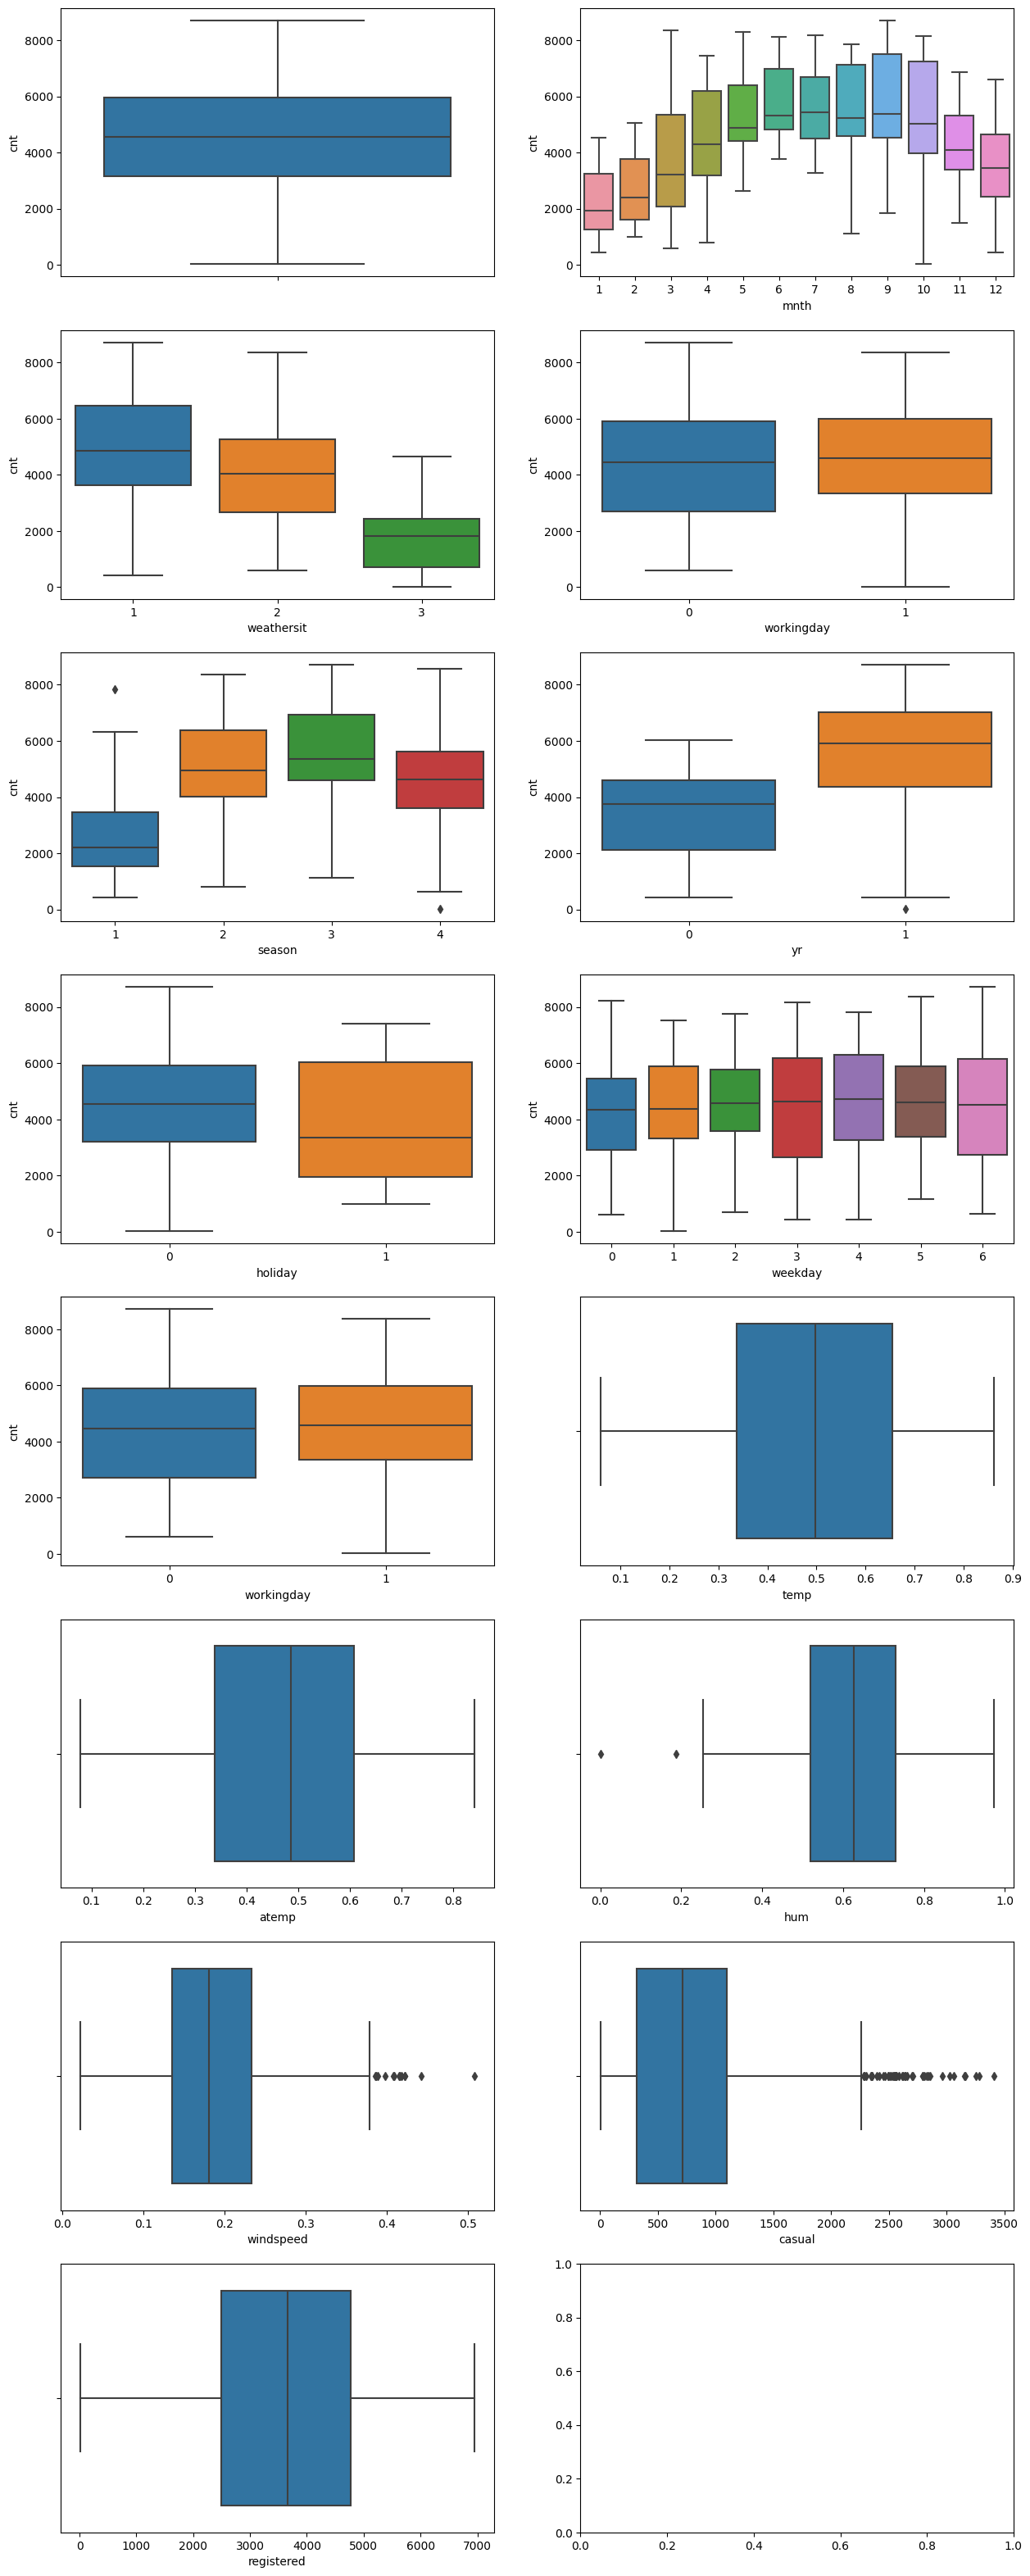

In [12]:
fig,ax = plt.subplots(ncols=2, nrows= 8, figsize = (15,40))
sns.boxplot(data=df, y = 'cnt',ax=ax[0][0])
sns.boxplot(data=df, x = 'mnth', y = 'cnt',ax=ax[0][1])
sns.boxplot(data=df, x = 'weathersit', y = 'cnt', ax=ax[1][0])
sns.boxplot(data=df, x = 'workingday', y = 'cnt',ax=ax[1][1])
sns.boxplot(data=df, x = 'season', y = 'cnt',ax=ax[2][0])
sns.boxplot(data=df, x = 'yr', y = 'cnt',ax=ax[2][1])
sns.boxplot(data=df, x = 'holiday', y = 'cnt',ax=ax[3][0])
sns.boxplot(data=df, x = 'weekday', y = 'cnt',ax=ax[3][1])
sns.boxplot(data=df, x = 'workingday', y = 'cnt',ax=ax[4][0])
sns.boxplot(data=df, x = 'temp',ax=ax[4][1])
sns.boxplot(data=df, x = 'atemp', ax=ax[5][0])
sns.boxplot(data=df, x = 'hum', ax=ax[5][1])
sns.boxplot(data=df, x = 'windspeed', ax=ax[6][0])
sns.boxplot(data=df, x = 'casual', ax=ax[6][1])
sns.boxplot(data=df, x = 'registered', ax=ax[7][0])

In [13]:
shape_before_removing_outlier = df.shape
shape_before_removing_outlier

(731, 16)

what is z score and how can we find outliers with z-score? why 3 SD?

In [14]:
# removing outlier based on z-score for each row, all column values that are within 3 standard deviations from the mean

df = df[(np.abs(stats.zscore(df.iloc[:, 2:])) < 3).all(axis=1)]

In [15]:
shape_after_removing_outlier = df.shape
shape_after_removing_outlier

# 31 records were removed from the dataset.

(700, 16)

In [16]:
df[['casual', 'registered', 'cnt']]

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600
...,...,...,...
726,247,1867,2114
727,644,2451,3095
728,159,1182,1341
729,364,1432,1796


Looks like cnt = casual + registered
So keeping casual and registered in the train dataset can cause data lekage.
So lets drop casual and registered from the train dataset.
what is data lekage and how extremely colinear features cause data lekage?

<Axes: >

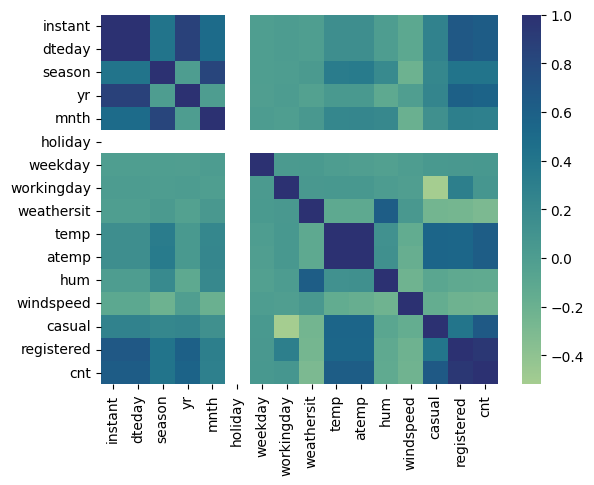

In [17]:
sns.heatmap(df.corr('pearson'), cmap="crest")

Instance feature is just a primary key for the table which is the same as the date column so we can drop instance as well.
Temp feature has a strong correlation with atemp(feels like temperature) so we can drop atemp feature.

In [18]:
X = df.drop(['instant', 'cnt', 'registered', 'casual', 'atemp', 'holiday'], axis=1)
X.reset_index(drop=True, inplace=True)
y = df['cnt']

In [19]:

# # # Split the data into train(80%) and test(20%)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression:
--what is regression
-what is linear, multilinear, polynomial regression
-what is regularization and why we use it?
-what is Ridge Regression
-what is Lasso Regression
-what is rmse and mae?


In [20]:
class Linear_Regression:
    def __init__(self, X, y, max_iteration, epsilon, lambda_, learning_rate, sgd, gd=True, regularization=True, batch_size = None) -> None:
        self.X = X
        self.y = y
        self.max_iteration = max_iteration
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.learning_rate = learning_rate
        self.sgd = sgd
        self.gd = gd
        self.regularization = regularization
        self.batch_size = batch_size

    def split_data(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle= True)
      return X_train, X_test, y_train, y_test

    def add_X0(self, X):
      return np.column_stack([np.ones([X.shape[0], 1]), X])

    def normalize_train(self,X):
      mean = np.mean(X, axis = 0)
      std = np.std(X, axis = 0)
      X = (X - mean) / std
      X = self.add_X0(X)
      return X, mean, std

    def normalize_test(self, X, mean, std):
      X = (X - mean) / std
      X = self.add_X0(X)
      return X

    def rank(self, X):
      u, s, v = np.linalg.svd(X)
      return len([x for x in s if x > 0.0005])

    def check_fullRank(self,X):
      rank = self.rank(X)
      if rank == min(X.shape):
        self.full_rank = True
        # print("it is full rank")
      else:
        self.full_rank = False
        # print("it is not full rank")

    def check_lowRank(self, X):
      if X.shape[0] < X.shape[1]:
        self.low_rank = True
        # print("it is low rank")
      else:
        self.low_rank = False
        # print("it is not low rank")

    def closed_form_solution(self, X, y):
    #Adding the penalty term as L2 Norm
      if self.regularization == True:
        self.theta = np.linalg.inv(X.T.dot(X) + self.lambda_ * np.identity(X.shape[1])).dot(X.T).dot(y)
      else:
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

      return self.theta

    def predict(self, X):
      return X.dot(self.theta)
    
    def sse(self, X, y):
      y_hat = self.predict(X)
      return ((y_hat - y) ** 2).sum()
    
    def calculate_me(self, y_true, y_pred):
      return np.mean(y_true - y_pred)

    def calculate_rmse(self, y_true, y_pred):
      return np.sqrt(np.mean((y_true - y_pred) ** 2))

    def calculate_mae(self, y_true, y_pred):
      return np.mean(np.abs(y_true - y_pred))

    def calculate_mpe(self, y_true, y_pred):
      return np.mean((y_true - y_pred) / y_true) * 100

    def calculate_mape(self, y_true, y_pred):
      return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def cost_function(self, X, y):
      loss = self.sse(X, y)
      return loss / 2
    
    def cost_derivative(self, X, y):
      if self.regularization == 'ridge':
        y_hat = self.predict(X)
        return (X.T.dot(y_hat - y) + self.lambda_ * self.theta)
      elif self.regularization == 'lasso':
        y_hat = self.predict(X)
        return (X.T.dot(y_hat - y)+ np.sign(self.theta))
      else:
        y_hat = self.predict(X)
        return X.T.dot(y_hat - y)

    def gradient_descent(self, X, y):
      errors = []
      prev_error = float("inf")

      for t in tqdm(range(self.max_iteration), colour = 'blue'):
        self.theta -= self.learning_rate * self.cost_derivative(X, y)
        error = self.cost_function(X, y)
        errors.append(error)

        if abs(error - prev_error) < self.epsilon:
          print("Model stopped learning")
          break

      self.plot_rmse(errors)    
      
    def stocastic_gradient_descent(self, X, y):
      errors = []
      prev_error = float("inf")
      
      print("Batch size: " + str(int(len(y) * self.batch_size)))
      
      self.slice_rowsX = int(X.shape[0] * self.batch_size)
      self.slice_rowsy = int(len(y) * self.batch_size)
      
      #slice X till batch_size
      sgdX = X[:self.slice_rowsX, :]
      sgdy = y[:self.slice_rowsy]

      for t in tqdm(range(self.max_iteration), colour = 'blue'):
        self.theta -= self.learning_rate * self.cost_derivative(sgdX, sgdy)
        error = self.cost_function(sgdX, sgdy)
        errors.append(error)

        if abs(error - prev_error) < self.epsilon:
          print("Model stopped learning")
          break

      self.plot_rmse(errors)

    def plot_prediction_comparison(self, y_true, y_pred):
      days = np.arange(len(y_true))  # Assuming one count per day
      
      plt.figure(figsize=(10, 6))
      plt.plot(days, y_true, color='black', label='True Values')
      plt.plot(days, y_pred, color='orange', label='Predicted Values')
      plt.xlabel('Days')
      plt.ylabel('Counts')
      plt.title('True Values vs. Predicted Values')
      plt.legend()
      plt.grid(True)
      plt.show()
    
    def fit(self):
      X_train, X_test, y_train, y_test = self.split_data()
      X_train, mean, std = self. normalize_train(X_train)
      X_test = self.normalize_test(X_test, mean, std)
      self.check_fullRank(X_train)
      self.check_lowRank(X_train)

      if self.full_rank and not self.low_rank and X_train.shape[1] < 1000 and not self.gd and not self.sgd:
          print("Closed form solution")
          self.closed_form_solution(X_train, y_train)
      elif self.gd or self.low_rank:
        print("Gradient Descent")
        self.theta = np.ones(X_train.shape[1])
        self.gradient_descent (X_train, y_train)
      else:
        print("Stochastic Gradient Descent")
        self.theta = np.ones(X_train.shape[1])
        self.stocastic_gradient_descent(X_train, y_train)

      y_pred = self.predict(X_test)
      # print('Thetas: ', self.theta)
      # print("Predicted values:", y_pred)
      # print("True values:", y_test)
      self.plot_prediction_comparison(y_test, y_pred)
      
      rmse = self.calculate_rmse(y_test, y_pred)
      mae = self.calculate_mae(y_test, y_pred)
      me = self.calculate_me(y_test, y_pred)
      mpe = self.calculate_mpe(y_test, y_pred)
      mape = self.calculate_mape(y_test, y_pred)

      print("Mean Error (ME):", me)
      print("Root Mean Squared Error (RMSE):", rmse)
      print("Mean Absolute Error (MAE):", mae)
      print("Mean Percentage Error (MPE):", mpe)
      print("Mean Absolute Percentage Error (MAPE):", mape)


    def plot_rmse(self, error_sequence):
        """
        @X: error_sequence, vector of rmse
        @does: Plots the error function
        @return: plot
        """
        # Data for plotting
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel=list(range(len(error_sequence))))
        ax.grid()

        plt.legend(["Error Curve"], bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()


Closed form solution


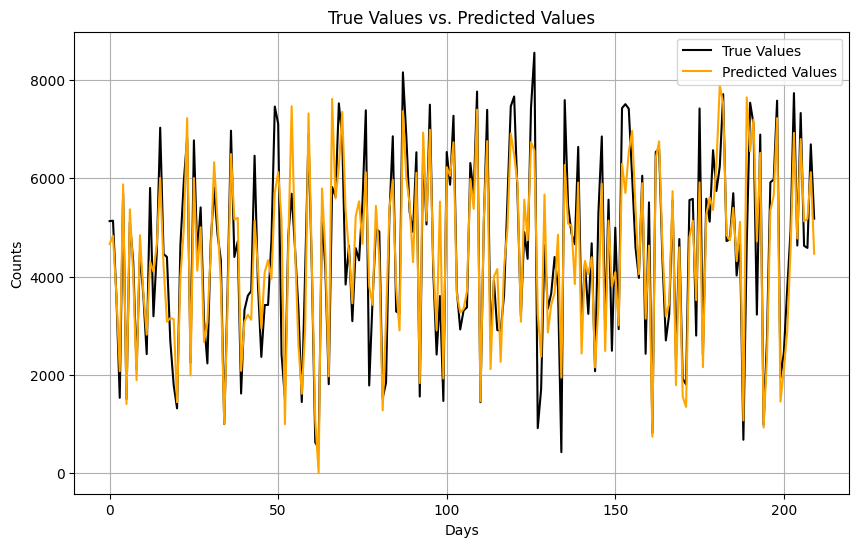

Mean Error (ME): 36.772010352144235
Root Mean Squared Error (RMSE): 790.8108676423595
Mean Absolute Error (MAE): 602.3621727749218
Mean Percentage Error (MPE): -4.665444620851703
Mean Absolute Percentage Error (MAPE): 18.33298962085403


In [29]:
# Closed form solution

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = False, regularization=False)
lr.fit()

Gradient Descent


  0%|          | 0/8000 [00:00<?, ?it/s]

100%|██████████| 8000/8000 [00:01<00:00, 7867.32it/s]


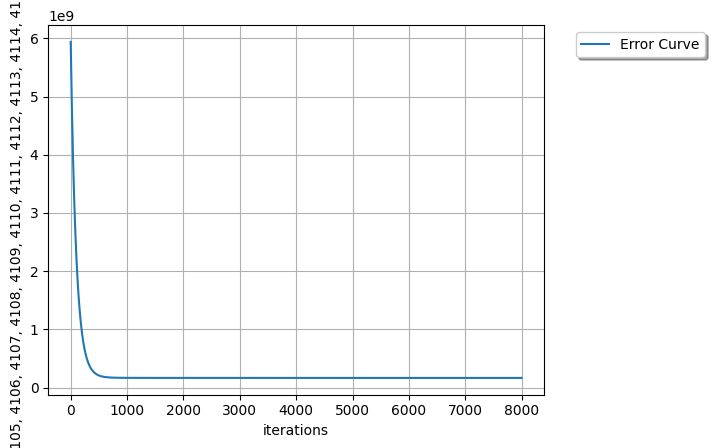

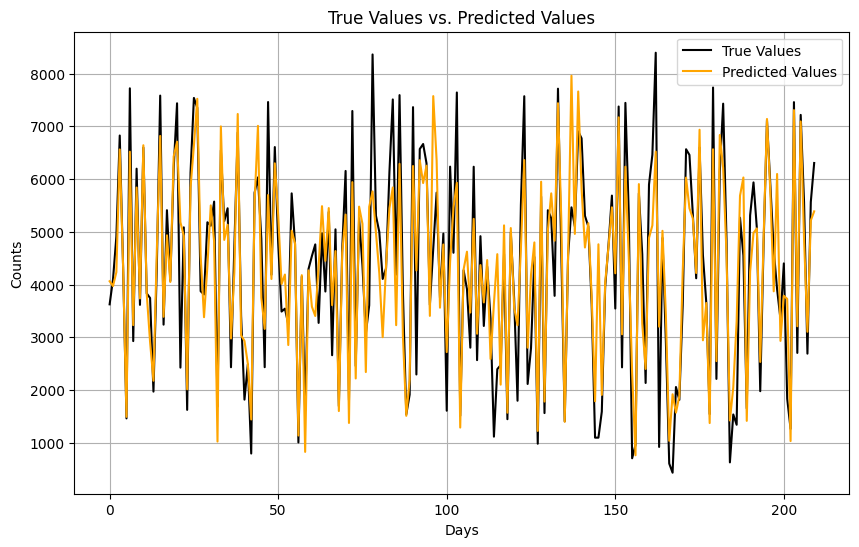

Mean Error (ME): -11.999592651422478
Root Mean Squared Error (RMSE): 913.2577557530511
Mean Absolute Error (MAE): 662.5161531257775
Mean Percentage Error (MPE): -11.065024405079384
Mean Absolute Percentage Error (MAPE): 24.132893557778253


In [28]:
# Gradient Descent without Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization=False)
lr.fit()

Gradient Descent


100%|██████████| 8000/8000 [00:01<00:00, 7632.20it/s]


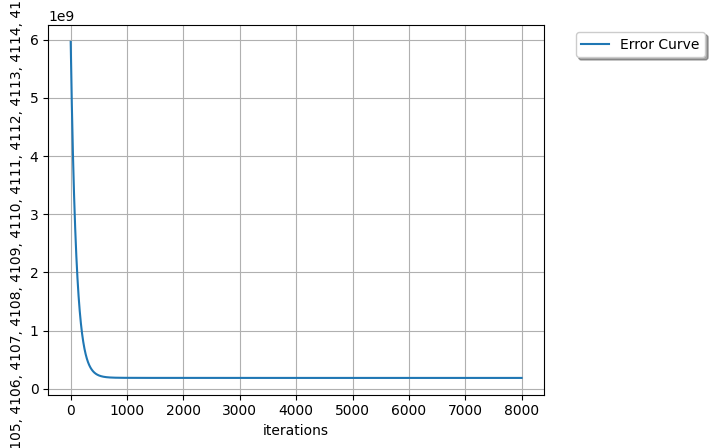

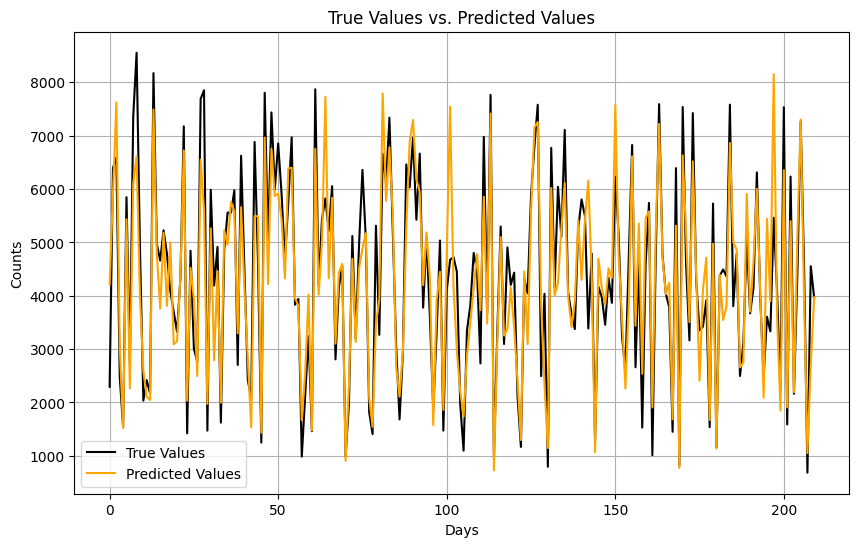

Mean Error (ME): 68.41649067994027
Root Mean Squared Error (RMSE): 797.2794979280155
Mean Absolute Error (MAE): 601.73278610615
Mean Percentage Error (MPE): -2.4390353511011984
Mean Absolute Percentage Error (MAPE): 15.791874946570635


In [23]:
# Gradient Descent with Lasso Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization='lasso')
lr.fit()

Gradient Descent


100%|██████████| 8000/8000 [00:01<00:00, 7906.11it/s]


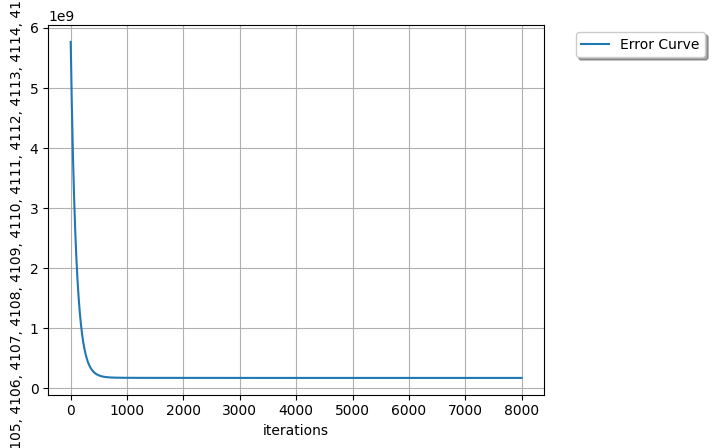

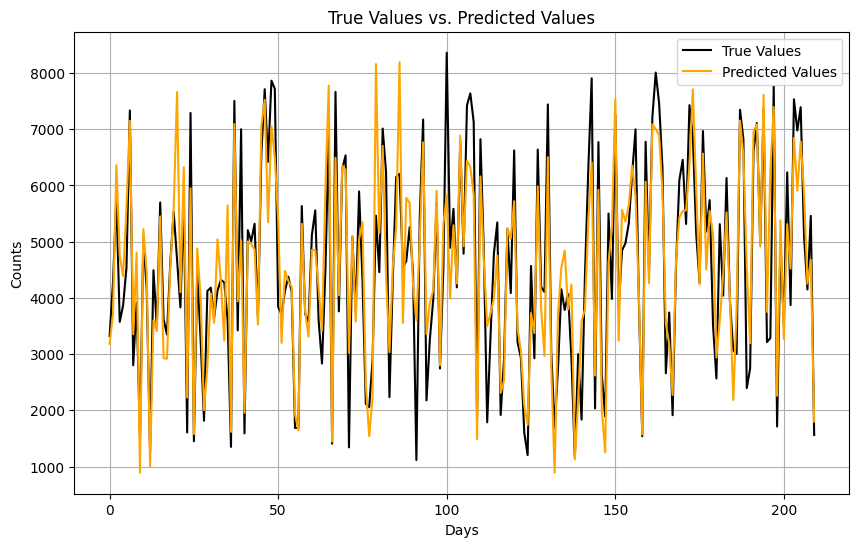

Mean Error (ME): -13.502524632907512
Root Mean Squared Error (RMSE): 856.9215354155554
Mean Absolute Error (MAE): 648.0025798946369
Mean Percentage Error (MPE): -4.758368716373227
Mean Absolute Percentage Error (MAPE): 17.542877973020925


In [24]:
# Gradient Descent with Ridge Regularization

lr = Linear_Regression(X.iloc[:, 1:], y, max_iteration=8000, epsilon=0.03, learning_rate=0.00001, lambda_ = 0.01, sgd = False, gd = True, regularization='ridge')
lr.fit()

compare rmse for
close form,
gradient descent,
gd with lasso,
gd with ridge,

### ARIMA

what is time series data, how is time series data different than normal data ,why is our data time series, why is arima better than linear regression for time series data?

2. explain arima steps: finding stationart, ar phase, ma phase, combine phase.

In [25]:
df = pd.read_csv('BlueBikeDay.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


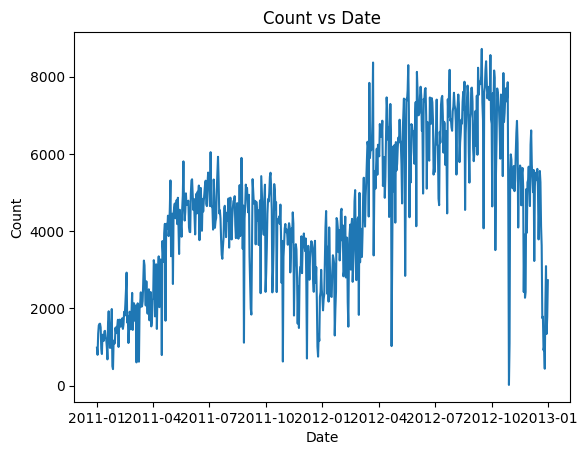

In [26]:
import matplotlib.pyplot as plt

plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count vs Date')
plt.show()
